# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data: load the wine dataset from sklearn, and assign the feature names to a variable called X.

In [79]:
# your code here:
from sklearn.datasets import load_wine

In [80]:
wine = load_wine()
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [81]:
X = pd.DataFrame(wine['data'], columns= wine['feature_names'])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Challenge 1: K-Means

#### 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [142]:
# your code here:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_d = StandardScaler().fit_transform(new_wine)

X_df = pd.DataFrame(X_d, columns=wine['feature_names'])
# X_df.head()
X_df1 =X_df # copy of X_df

X_df2 = X_df1 #copy of X_df1


In [83]:
# traning of clusters on the dataset

km =KMeans(n_clusters=8, random_state= 100)
kmean= km.fit(X_df)
kmeans = kmean.predict(X_df)

# print(pd.Series(kmeans).value_counts().sort_index())
X_df['cluster'] = kmeans
X_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,6
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,6
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,6
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,6
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


In [84]:
from sklearn.metrics import silhouette_score

K = range(2, 9)
silhouette = []

for k in K:
    km = KMeans(n_clusters=k, random_state =100)
    
    
    km.fit(X_df)
    silhouette.append(silhouette_score(X_df, km.predict(X_df)))
print(silhouette)
print('getting the 8th cluster:',  silhouette[6])

[0.3086856346732238, 0.307170832463426, 0.29694881614808616, 0.31068458972529794, 0.302651760674832, 0.31591263345450415, 0.26764893066755435]
getting the 8th cluster: 0.26764893066755435


Text(0.5, 1.0, 'silhouette_score showing the optimal k')

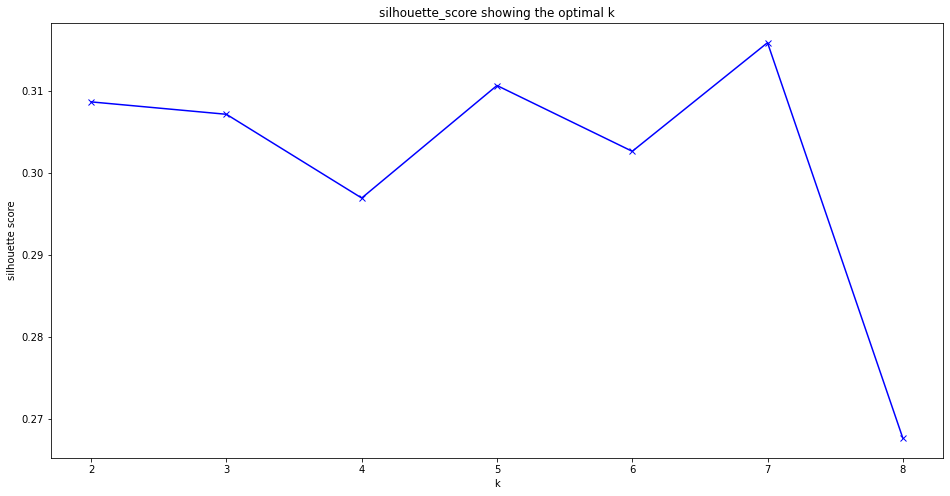

In [85]:
# to visualize the score
plt.figure(figsize=(16,8)) 
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K) +1,  1.0))
plt.title('silhouette_score showing the optimal k')

#### 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [86]:
# your code here:

km =KMeans(n_clusters=5, random_state= 100)
kmean= km.fit(X_df)
kmeans = kmean.predict(X_df)

# print(pd.Series(kmeans).value_counts().sort_index())
X_df['cluster'] = kmeans
X_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,3


In [87]:
K = range(2, 6)
silhouette = []

for k in K:
    km = KMeans(n_clusters=k, random_state =100)
    
    
    km.fit(X_df)
    silhouette.append(silhouette_score(X_df, km.predict(X_df)))
print(silhouette)
print('getting the 5th cluster:',  silhouette[3])   # we use 3 because the first is the second

[0.23676813223671334, 0.26911196244223157, 0.32000554157484634, 0.2860577932301471]
getting the 5th cluster: 0.2860577932301471


Text(0.5, 1.0, 'silhouette_score showing the optimal k')

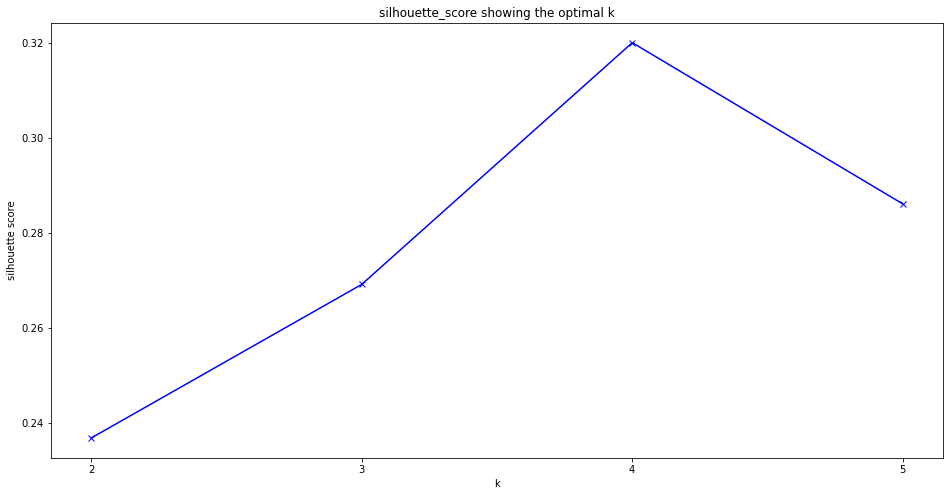

In [88]:
plt.figure(figsize=(16,8)) 
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K) +1,  1.0))
plt.title('silhouette_score showing the optimal k')

#### 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [89]:
# your code here:
K = range(2, 4)
silhouette = []

for k in K:
    km = KMeans(n_clusters=k, random_state =100)
    
    
    km.fit(X_df)
    silhouette.append(silhouette_score(X_df, km.predict(X_df)))
print(silhouette)
print('getting the 3th cluster:',  silhouette[1])

[0.23676813223671334, 0.26911196244223157]
getting the 3th cluster: 0.26911196244223157


#### 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

Please do two visualizations: one with inertia, and one with the silhouette score.

Text(0.5, 1.0, 'silhouette_score showing the optimal k')

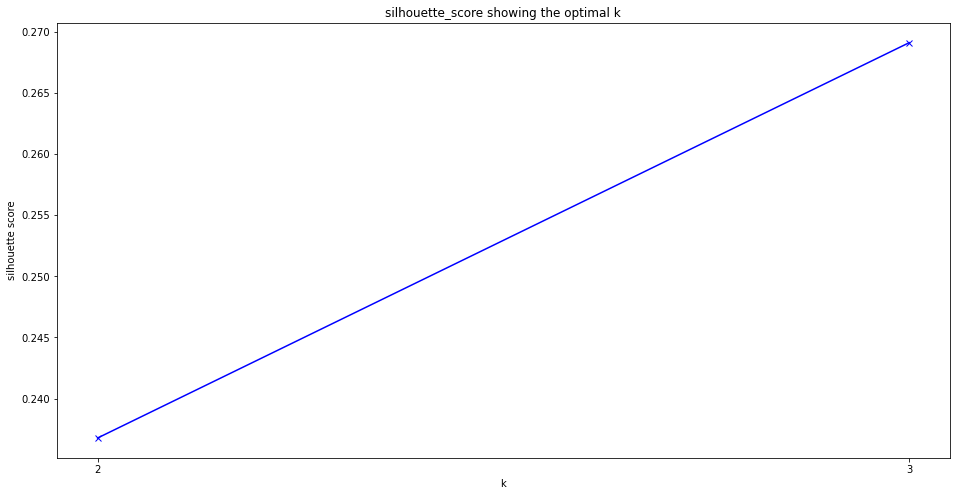

In [91]:
# your code here:
plt.figure(figsize=(16,8)) 
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K) +1,  1.0))
plt.title('silhouette_score showing the optimal k')

## Challenge 2: Aggromerative Clustering

#### 1. Please fit an AgglomerativeClustering model and compare the results you get to the KMeans results. Plot an elbow curve using the silhouette score.

In [152]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 8)

agglo_model = model.fit_predict(X_df1)

X_df1['cluster'] = agglo_model

X_df1.head()
silhouette_score(X_df1, agglo_model) # only for ones pecific K

0.3514653381003064

In [128]:
K = range(2, 9)
silhouette_hc = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X_df1)
    silhouette_hc.append(silhouette_score(X_df1, model.fit_predict(X_df1)))
print(silhouette_hc)
print('getting the 8th cluster:',  silhouette_hc[6])

[0.27297547531135885, 0.30583863042364934, 0.31442886976780426, 0.3146813117862672, 0.31046312758363764, 0.3208385913467395, 0.3150651559481663]
getting the 8th cluster: 0.3150651559481663


#### 2. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [156]:
import seaborn as sns
X_df1['cluster'].sns()

AttributeError: 'Series' object has no attribute 'sns'

In [137]:
clusterval = X_df1['cluster'].unique()
for cluster in clusterval:
    plt.scatter(X_df1[X_df1['cluster']==cluster][0], X_df1[X_df1['cluster']==cluster][1])
# plt.show()
print(clusterval)

KeyError: 0

## Bonus Challenge: 
#### Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [161]:
from sklearn.decomposition import PCA

pca = PCA(n_components =4, svd_solver = 'full')

pca1= pca.fit(X_df2)


X_df3 = pd.DataFrame(pca1.transform(X_df2))
round(X_df3.corr(), 17)

,0,1,2,3
0,1.000000e+00,2.100000e-16,7.000000e-17,-2.400000e-16
1,2.100000e-16,1.000000e+00,1.900000e-16,-2.200000e-16
2,7.000000e-17,1.900000e-16,1.000000e+00,-1.300000e-16
3,-2.400000e-16,-2.200000e-16,-1.300000e-16,1.000000e+00


In [146]:
P

PCA(n_components=2, svd_solver='full')